<a href="https://colab.research.google.com/github/orlandhopes2023/Curso-HCSPD/blob/main/Vargas_Reales_Orlando_Del_Valle_M1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRABAJO SEMANA 1-CIRCUITO RLC

Actividades.

1- Asignar valores a R=1 $ \Omega $ , L=1 $  Hy $, y C=1F.

a. Empleando la solución analítica, simular 3 segundos con una entrada de tensión
escalón de 12V.

b. Empleando el cálculo mediante Euler, verificar que coincida con el ítem anterior.

2- Asignar valores a R=2,2K, L=10Hy, y C=100nF. Obtener simulaciones que permitan
estudiar la dinámica del sistema, con una entrada de tensión escalón de 12V.

3- Asumir que la tensión de entrada cambia de signo cada 1ms.

Se resuelve la ecuacion diferencial del circuito RLC de la figura.

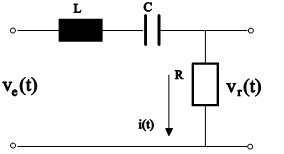

Las ecuaciones son
<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
\frac{di(t)}{dt}=-\frac{R}{L}i(t)-\frac{1}{L}v_c(t) + \frac{1}{L}v_e(t)  \\
\frac{dv_c(t)}{dt}=\frac{1}{C}i(t)
\end{cases}
\end{equation*} \tag*{}$

con las condiciones iniciales nulas para la corriente $i(0)=0$ y la tensión del capacitor $v_c(0)=0$.

## Instalación de Octave en el entorno Colab
Se instala el programa Octave, y las librerías necesarias.

In [ ]:
# !apt-get update #Usar para actualizar librerias, únicamente

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# https://gnu-octave.github.io/packages/
# https://github.com/gnu-octave/symbolic
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
octave is already the newest version (6.4.0-2).
python3-sympy is already the newest version (1.9-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
%%writefile Inst_S.m
pkg install -forge symbolic

Overwriting Inst_S.m


In [ ]:
!octave -W Inst_S.m #  corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [ ]:
!pip install --user sympy==1.5.1 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

Se debe agregar en el .m el path donde está el Python, mediante una línea como ésta:

---


**setenv PYTHON /usr/local/bin/python**


---


para acceder al sympy desde symbolic. No obtante, puede ser diferente el path y debe verificarse en caso de que no funcione.


In [ ]:
%%writefile Calculo_RLC_Simbolico.m
clear all; clc;
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
% #R=2.2e3;L=10e-6;C=100e-9;
syms ii(t) v(t) R L C Ve
%DAMOS VALORES A R L C Ve
R=1%Ohm
L=1%Hy
C=1%F
Ve=12%V
ode2=diff(v)==ii/C;
ode1=diff(ii)==-R/L*ii-1/L*v+1/L*2*Ve*heaviside(0);
% ode1=diff(ii)==-ii-v+heaviside(0,1);%heaviside(0) devuelve .5
cond1 = ii(0) == 0;
cond2 = v(0) == 0;
conds = [cond1;cond2];
odes = [ode1; ode2];
Sol=dsolve(odes,ii(0) == .0,v(0) == .0);
Corriente=simplify(Sol.ii)
Tension=simplify(Sol.v)

% Guardar las soluciones simbólicas en un archivo .mat

save('Calculo_RLC_Simbolico.m', 'Corriente', 'Tension');

Overwriting Calculo_RLC_Simbolico.m


Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

In [ ]:
!octave -W Calculo_RLC_Simbolico.m # -W : no window system

Symbolic pkg v3.2.1: Python communication link active, SymPy v1.5.1.
R = 1
L = 1
C = 1
Ve = 12
Corriente = (sym)

        -t           
        ───          
         2     ⎛√3⋅t⎞
  8⋅√3⋅ℯ   ⋅sin⎜────⎟
               ⎝ 2  ⎠

Tension = (sym)

             -t               
             ───              
              2     ⎛√3⋅t   π⎞
  12 - 8⋅√3⋅ℯ   ⋅sin⎜──── + ─⎟
                    ⎝ 2     3⎠




In [ ]:
%%writefile Grafico_simbolic_RLC.m
clc;clear all;
warning('off','all');
%Variables y parametros a determinar
tsim=3
Ve=12
color_='-r';
color='-b';
tamano1=2
tamano2=3
% Generar valores de t para la gráfica
t_values = linspace(0, tsim, 100);  % Valores de t desde 0 a 10 con 100 puntos
Ve_values = Ve * ones(size(t_values));%Al poner la coma ya no me mostrara la salida de V_values creada

% Evaluar las expresiones simbólicas en los valores de t_values
% Llamar a la función solsym para obtener los valores de Corriente y Tension
X = solsym(t_values);

% Extraer los valores de Corriente y Tension de la matriz de salida
i_values = X(1, :);
v_values = X(2, :);




figsym = figure(1); set(figsym, 'Visible', 'off');

% Primera gráfica

subplot(3,1,1); % Crea una matriz 2x1 de gráficos y selecciona el primer gráfico
plot(t_values, i_values,color,'LineWidth', tamano2);
title('Graficas de la solucion analitica i(t),v(t) y de la entrada');
xlabel('t');
ylabel('i(t)');
grid on;

% Segunda gráfica
subplot(3,1,2); % Selecciona el segundo gráfico en la matriz 2x1
plot(t_values, v_values,color,'LineWidth', tamano1);
%title('Grafica de la funcion simbolica vc(t)');
xlabel('t');
ylabel('v_c(t)');
grid on;

%% Tercera gráfica
subplot(3,1,3)
plot(t_values,Ve_values,color,'LineWidth', tamano2);
%title('Entrada Ve');
xlabel('t [s]');
ylabel('v_e(t)');
grid on

print(figsym,'R_symbolica','-r300','-dpng'); %El nombre del archivo sera R_symbolica.png
save('Grafico_simbolic.mat','-v7');



Overwriting Grafico_simbolic_RLC.m


In [ ]:
%%writefile solsym.m
% Funcion modelo
function X = solsym(t_values)
  % Inicializar los vectores de resultados
  Corriente_values = zeros(size(t_values));
  Tension_values = zeros(size(t_values));

  % Evaluar las expresiones para cada valor de t
  for i = 1:length(t_values)
    t = t_values(i);
    Corriente_values(i) = 8 * sqrt(3) * exp(-t/2) * sin((sqrt(3) * t) / 2);
    Tension_values(i) = 12 - 8 * sqrt(3) * exp(-t/2) * sin((sqrt(3)/2 * t + pi/3));
  end

  % Combinar los resultados en una matriz de salida
  X = [Corriente_values; Tension_values];
end

Overwriting solsym.m


In [ ]:
!octave -W Grafico_simbolic_RLC.m # -W : no window system
import scipy.io
mat1 = scipy.io.loadmat('/content/Grafico_simbolic.mat')

tsim = 3
Ve = 12
tamano1 = 2
tamano2 = 3


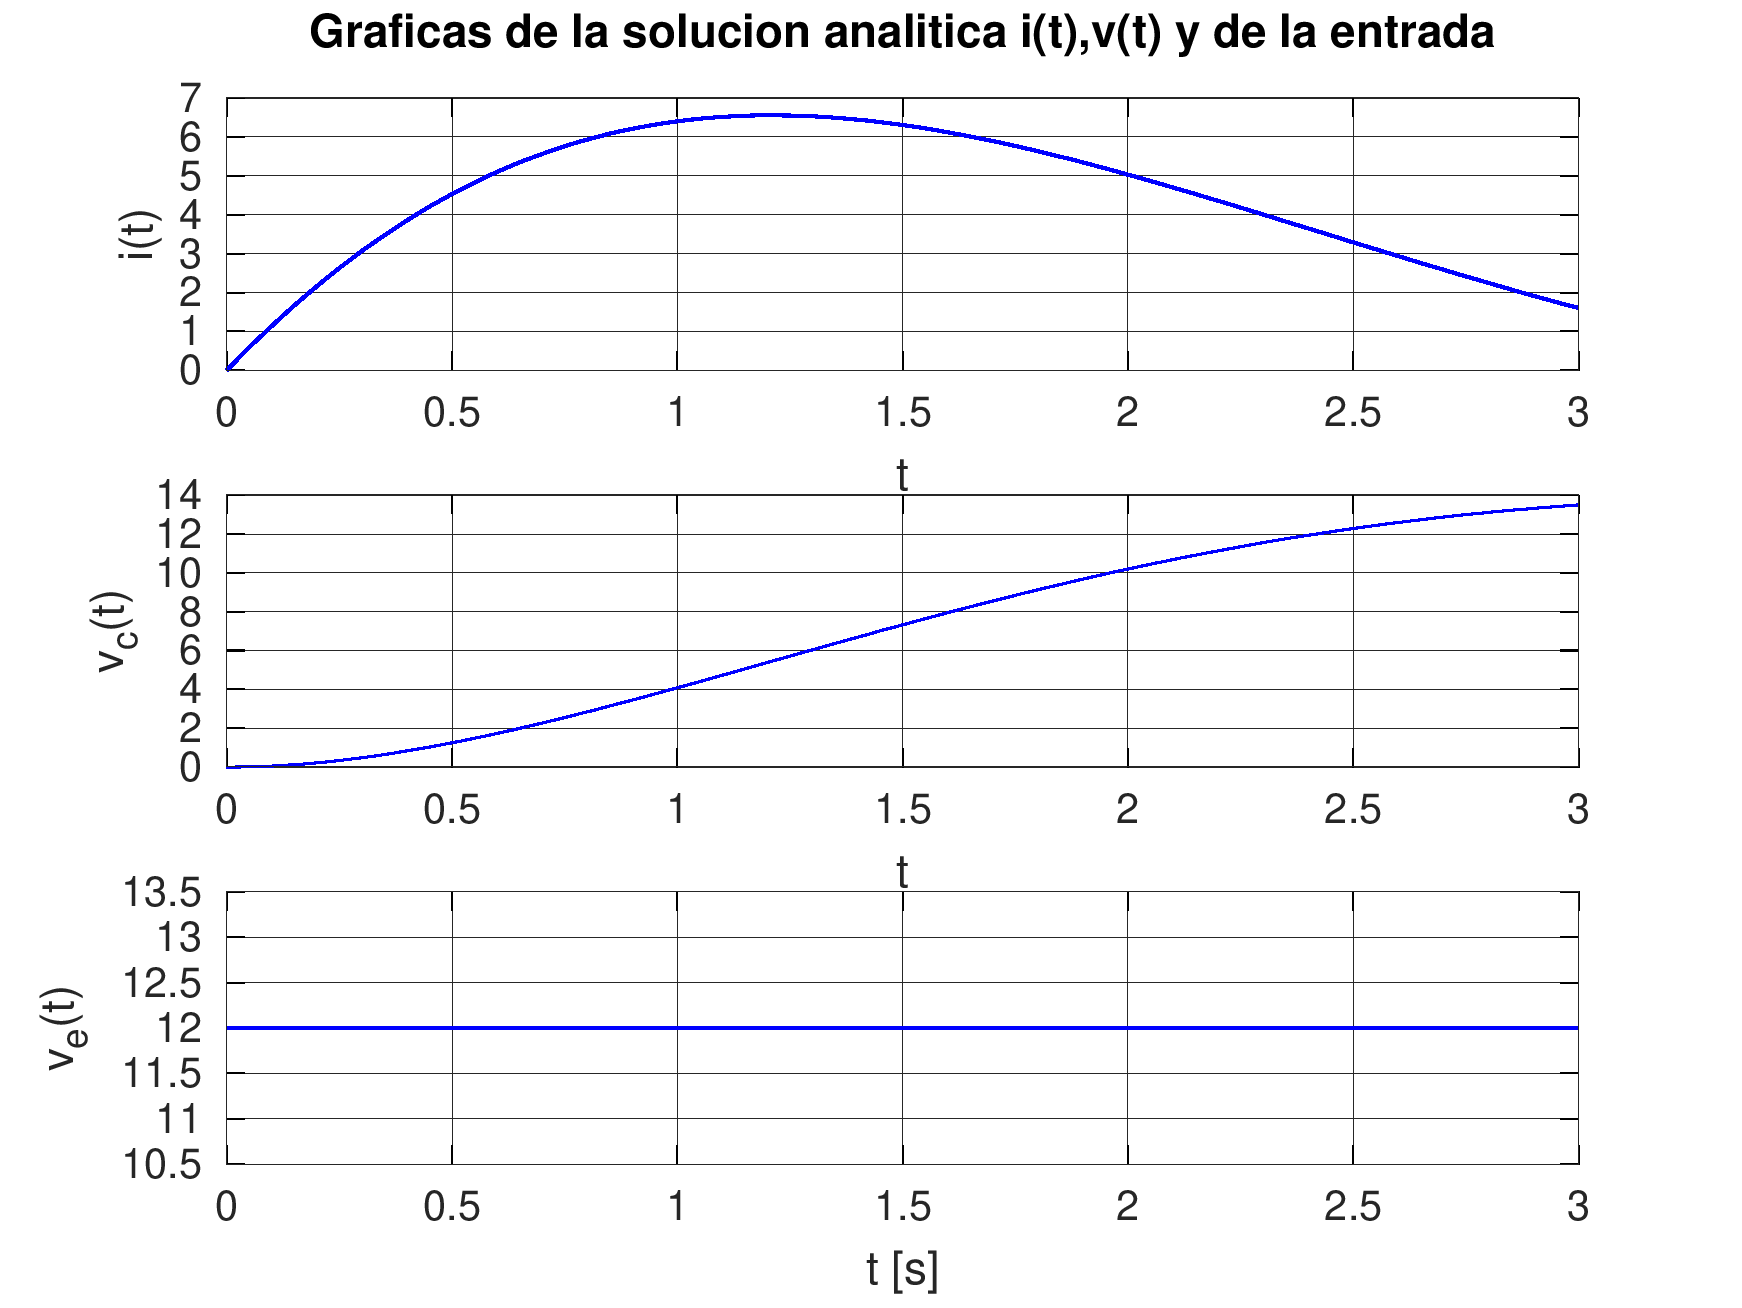

In [ ]:
from PIL import Image
imt1 = Image.open("/content/R_symbolica.png")
imt1

# Verificación numérica

En el siguiente script, se muestra la version de solucion numerica.

In [ ]:
%%writefile Verificacion_Num.m
clc;clear all;
warning('off','all');
tsim=3
X=-[0; 0];ii=0;t_etapa=1e-3;wRef=2;tF=tsim;%tiempo de simulacion tF
color_='r';
color='b';
Ts=t_etapa;
%A1=((2*Kp*Ts)+(Ki*(Ts^2))+(2*Kd))/(2*Ts);
%B1=(-2*Kp*Ts+Ki*(Ts^2)-4*Kd)/(2*Ts);
%C1=Kd/Ts;
%e=zeros(round(tF/t_etapa),1);
u=0;TL=1.15e-4;u=12;
%graphics_toolkit("gnuplot"); %No aconsejado
%graphics_toolkit("fltk");
%graphics_toolkit("qt"); %Aconsejado
% x1(1)=X(1);%corriente
% x2(2)=X(2);%tensión en el capacitor
R=1
L=1
C=1
for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;
  x1(ii)=X(1);%corriente
  x2(ii)=X(2);%tensión en el capacitor
  X=modrlc(t_etapa, X, u,R,L,C);
  acc(ii)=u;
end
t=0:t_etapa:tF;

paso=tF*1e-5/t_etapa %quiero que muestre el valor no pongo coma

hfig1 = figure(1); set(hfig1, 'Visible', 'off');


subplot(3,1,1);hold on;
plot(t,x1,color_);
title(sprintf('Soluciones numericas con un paso de %.2f', paso));
xlabel('t');
ylabel('i_R(t)'); hold on;
%plot(t,x1_analitica,color);
%title('x_1 corriente'); hold on;
grid on

subplot(3,1,2);hold on;
plot(t,x2,color_);
xlabel('t');
ylabel('v_c(t)');
%title('x_2 Vc_t');
grid on

subplot(3,1,3);hold on;
plot(t,acc,color_);
xlabel('t');
ylabel('v_e(t)');
%title('Entrada u_t, v_a');
%xlabel('Tiempo [Seg.]');
grid on

%figure(1)
%figure(2)
print(hfig1,'Vars_temporal','-r300','-dpng');
save('Verificacion_Num_1.mat','-v7');

Overwriting Verificacion_Num.m


In [ ]:
%%writefile modrlc.m
%Funcion modelo
function [X]=modrlc(t_etapa, xant, accion,R,L,C)
h=1e-5;t_simul=3;% R=1;L=1;C=1; %ES IMPORTANTE LA PROPORCION ENTRE T_ETAPA Y H, si h menor a tiempo etapa constante
A=[-R/L, -1/L;1/C,0];B=[1/L;0];%
% eig(A)
% 1./ans
C=[R 0];u=accion;
x=xant;
for ii=1:t_etapa/h
xp=A*x+B*u;
x=x+xp*h;
end
X=[x];%x1 corriente, x2 tensión

Overwriting modrlc.m


In [ ]:
# -W : no window system
!octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

tsim = 3
R = 1
L = 1
C = 1
paso = 0.030000


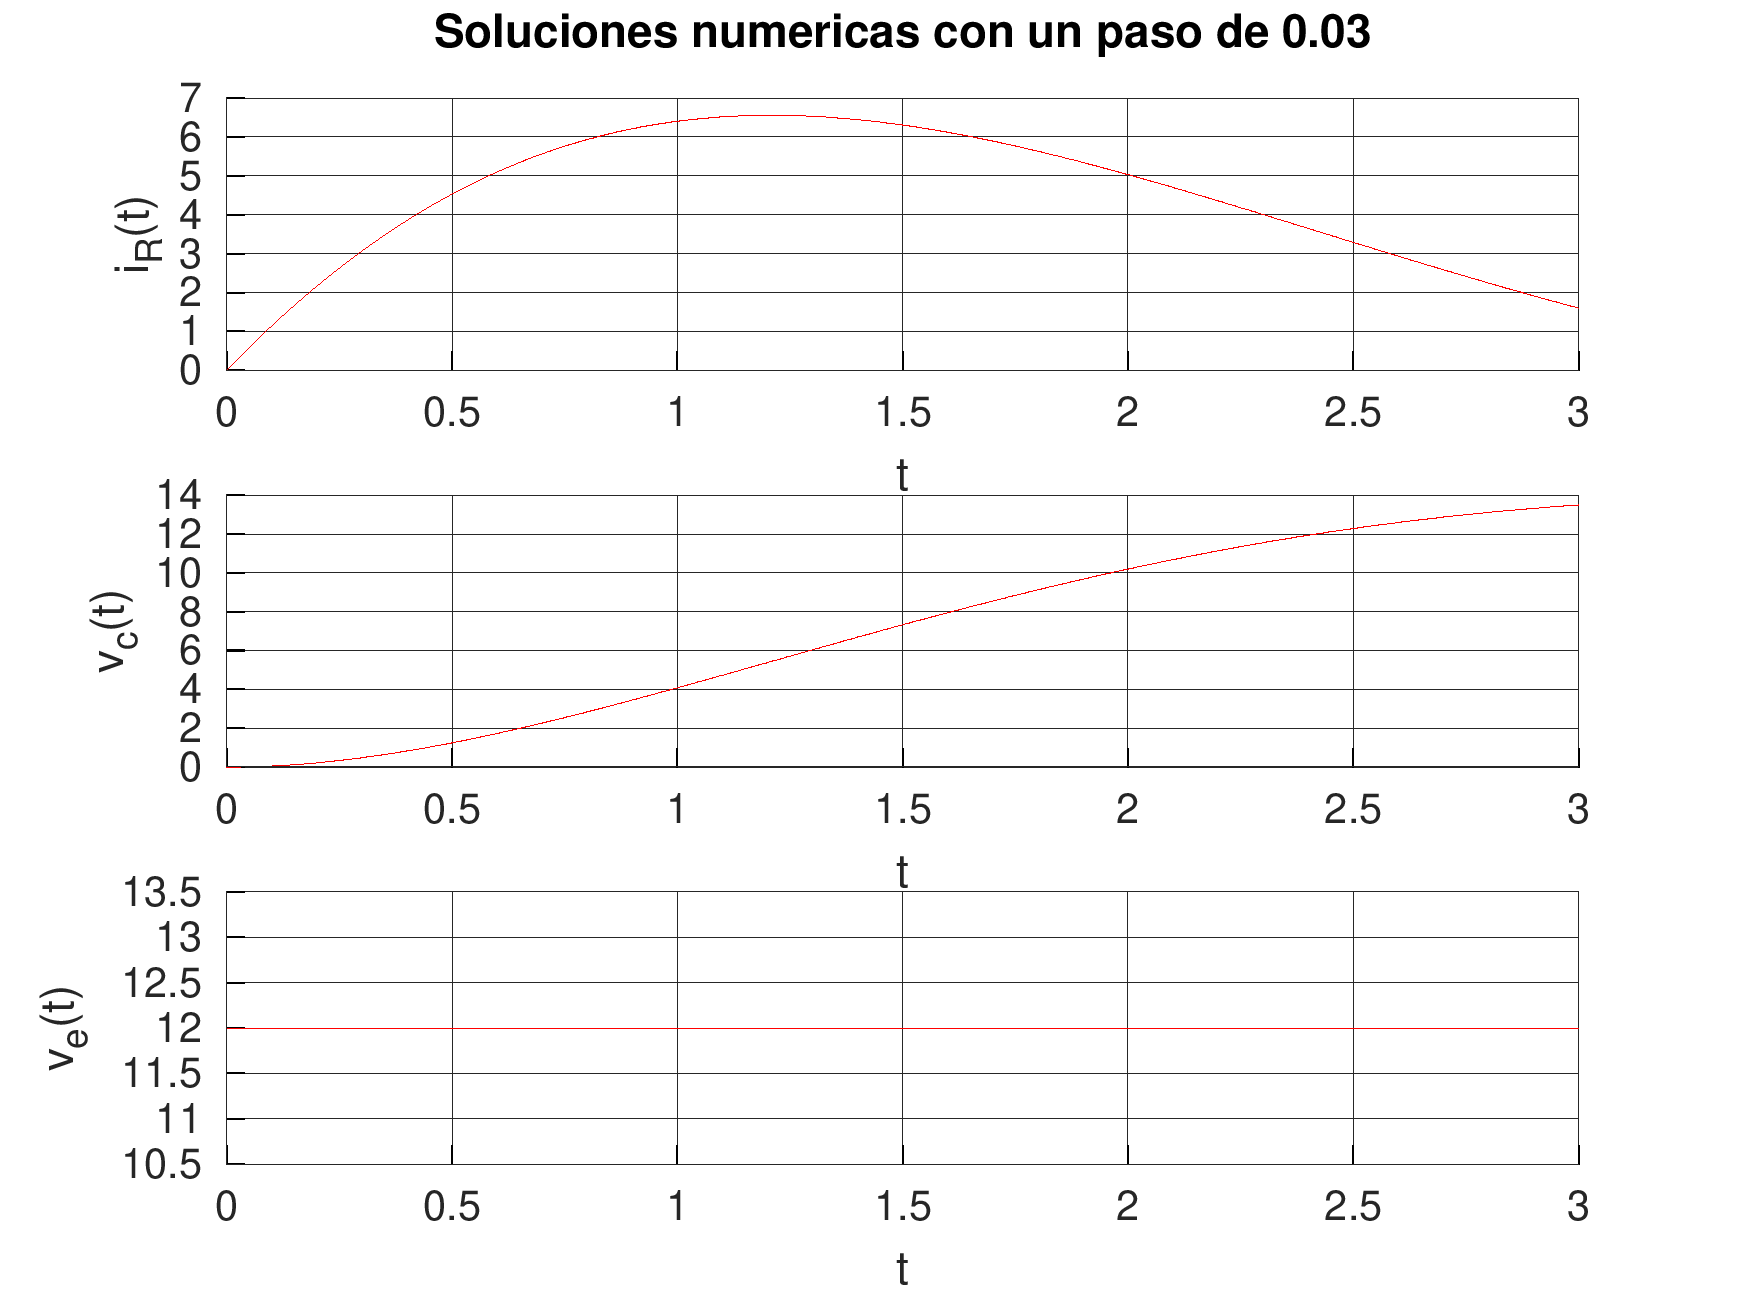

In [ ]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

Lo anterior prueba que lo simulado y lo anal\'itico coinciden.

En las imagenes anteriores no obstante si bien se realizo las simulaciones estipuladas, se tiene que el tiempo simulado es pequeno si queremos representar toda la evolucion.

# Simulacion con otros valores

## Eleccion tiempo de simulacion
La ecuación diferencial que estamos resolviendo es:

$ L \frac{d^2 I}{dt^2} + R \frac{dI}{dt} + \frac{I}{C} = \frac{d\epsilon(t)}{dt} $

donde la solución tambien puede expresarse como:

$ I(t) = \pm \frac{\epsilon}{L(\alpha_1 - \alpha_2)} \left( e^{\alpha_1 t} - e^{\alpha_2 t} \right)$

Como se menciona en [link](https://www.uv.es/martined/tecweb/GuionesI4-6.pdf).
donde la solución \(+\) corresponde al caso de conexión del generador y la solución \(-\) al caso de desconexión, y donde \(\alpha_1\) y \(\alpha_2\) son las raíces de la ecuación:

$ LC\alpha^2 + RC\alpha + 1 = 0 $

Las raíces son:

$ \alpha_{1,2} = \frac{-RC \pm \sqrt{R^2C^2 - 4LC}}{2LC} $

Si estas raíces resultan ser complejas, entonces la ecuación se reduce a:

$ I(t) = \pm \frac{\epsilon}{L\Omega} e^{-t/\tau} \sin(\Omega t) $

siendo:

$ \Omega = \sqrt{\frac{2LC - R^2C^2}{2L^2C^2}} \quad \text{y} \quad \tau = \frac{2L}{R} $

Podemos decir entonces que la respueesta esperada sera oscilatoria si **$\tau_{RC}=RC < 2\sqrt{LC}$**, caso contrario, la respuesta sera exponencial y el sistema no sera **estable**.

Por otro lado si bien la respuesta puede ser oscilatoria es interesante veer cuando se amortigua, esto se puede observar con el valor de $\tau$, que nos muestra el decaimiento. **Ya para un valor de t=5$\tau$ se puede interpretar que el fenomeno oscilatorio decae.**

In [ ]:
import numpy as np
R=2200
L=10*10**(-6)
C=100*10**(-9)
w0=1/np.sqrt(L*C)
tau=2*L/R
taurc=R*C
delta=w0**2-1/tau**2 #Escribimos el denominador para evitar valores muy chicos y no podamos diferenciar si  es un cero o no

# Datos del sistema dinamico-------(impreso con fstrings)
print(f"Constante de tiempo RL: {tau:.2e} \nConstante de tiempo RC: {taurc:.2e}\nDiscriminante: {delta:.2f} \nFrecuencia de resonancia: {w0:.2f}" )

# Sugerencia de tiempo de simulación---(impreso con %)
print('Luego para simular si %.2f es positivo, será útil tomar como tiempo de simulación %.2e \nsi %.2f es negativo y muy elevado, será útil tomar como tiempo de simulación %.2e \ndada la predominancia del circuito RC frente al RL, \ntal caso, la respuesta es sobreamortiguada y no se observaran oscilaciones'%(delta,5*tau,delta,5*taurc))

Constante de tiempo RL: 9.09e-09 
Constante de tiempo RC: 2.20e-04
Discriminante: -12099000000000000.00 
Frecuencia de resonancia: 1000000.00
Luego para simular si -12099000000000000.00 es positivo, será útil tomar como tiempo de simulación 4.55e-08 
si -12099000000000000.00 es negativo y muy elevado, será útil tomar como tiempo de simulación 1.10e-03 
dada la predominancia del circuito RC frente al RL, 
tal caso, la respuesta es sobreamortiguada y no se observaran oscilaciones


De lo anterior tenemos que el transitorio es bastante chico. **Simularemos con 1ms. no obstante como es sobreamortiguado no se esperan ver oscilaciones, mas bien tendencias exponenciales.** Puede ser que este tiempo sea chico como para poder observar el maximo de la repsuesta.

## Simulacion

In [ ]:
%%writefile Simulacion2.m
clc;clear all;
warning('off','all');

%Definicion de parametros
R=2200
L=10*10^(-6)
C=100*10^(-9)
TL=1.15*10^(-4);
u=12

tsim=0.001 %Del analisis %tiempo de simulacion
t_etapa=tsim/100000
wRef=2;
tF=tsim;

X=-[0; 0];ii=0;% CONDICIONES INICIALES

color_='r';%COLORES GRAFICO
color='b';
tamano2=2;
Ts=t_etapa;

h=t_etapa/10 %quiero que muestre el valor no pongo coma

%Calculo

for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;

  x1(ii)=X(1);%corriente
  x2(ii)=X(2);%tensión en el capacitor
  X=modrlc2(t_etapa, X, u,R,L,C,h);
  acc(ii)=u;
end

%Xprueba=modrlc2(0.01, [0,0], 12, 2200, 10^(-5), 10^(-7),10^(e-8))

%REPRESENTACION Grafica

t=0:t_etapa:tF;

hfig2 = figure(1); set(hfig2, 'Visible', 'off');

subplot(3,1,1);hold on;
plot(t,x1,color_,'LineWidth', tamano2);
title(sprintf('Soluciones numericas con un paso de %.2e', h));
xlabel('t');
ylabel('i_R(t)'); hold on;
%plot(t,x1_analitica,color);
hold on;
grid on

subplot(3,1,2);hold on;
plot(t,x2,color_,'LineWidth', tamano2);
xlabel('t');
ylabel('v_c(t)');
grid on

subplot(3,1,3);hold on;
plot(t,acc,color_,'LineWidth', tamano2);
xlabel('t');
ylabel('v_e(t)');

grid on

print(hfig2,'Simulacion1','-r300','-dpng');
% Guardar las variables en un archivo .mat
save('Sim2.mat','-v7');

Overwriting Simulacion2.m


In [ ]:
%%writefile modrlc2.m
% Función modelo
function [X] = modrlc2(t_etapa, xant, accion, R, L, C,h)
%h=1e-9;t_simul=1e-3;R=2.2e3;L=10e-6;C=100e-9;
    %h=e-5
    %t_etapa=e-3
    A = [-R/L, -1/L; 1/C, 0]; %Matriz de las ecuaciones diferenciales lineales
    B = [1/L; 0];
    C = [R 0];
    u = accion;
    x = xant;

    for ii = 1:(t_etapa/h)
        xp = A * x + B * u;
        x = x + xp * h;
    end

    X = [x]; % x1 corriente, x2 tensión
end


Overwriting modrlc2.m


In [ ]:
# -W : no window system
!octave -W Simulacion2.m
import scipy.io
mat2 = scipy.io.loadmat('/content/Sim2.mat')#Se carga asi pues son los que puede cargar .mat

R = 2200
L = 1.0000e-05
C = 1.0000e-07
u = 12
tsim = 1.0000e-03
t_etapa = 1.0000e-08
h = 1.0000e-09


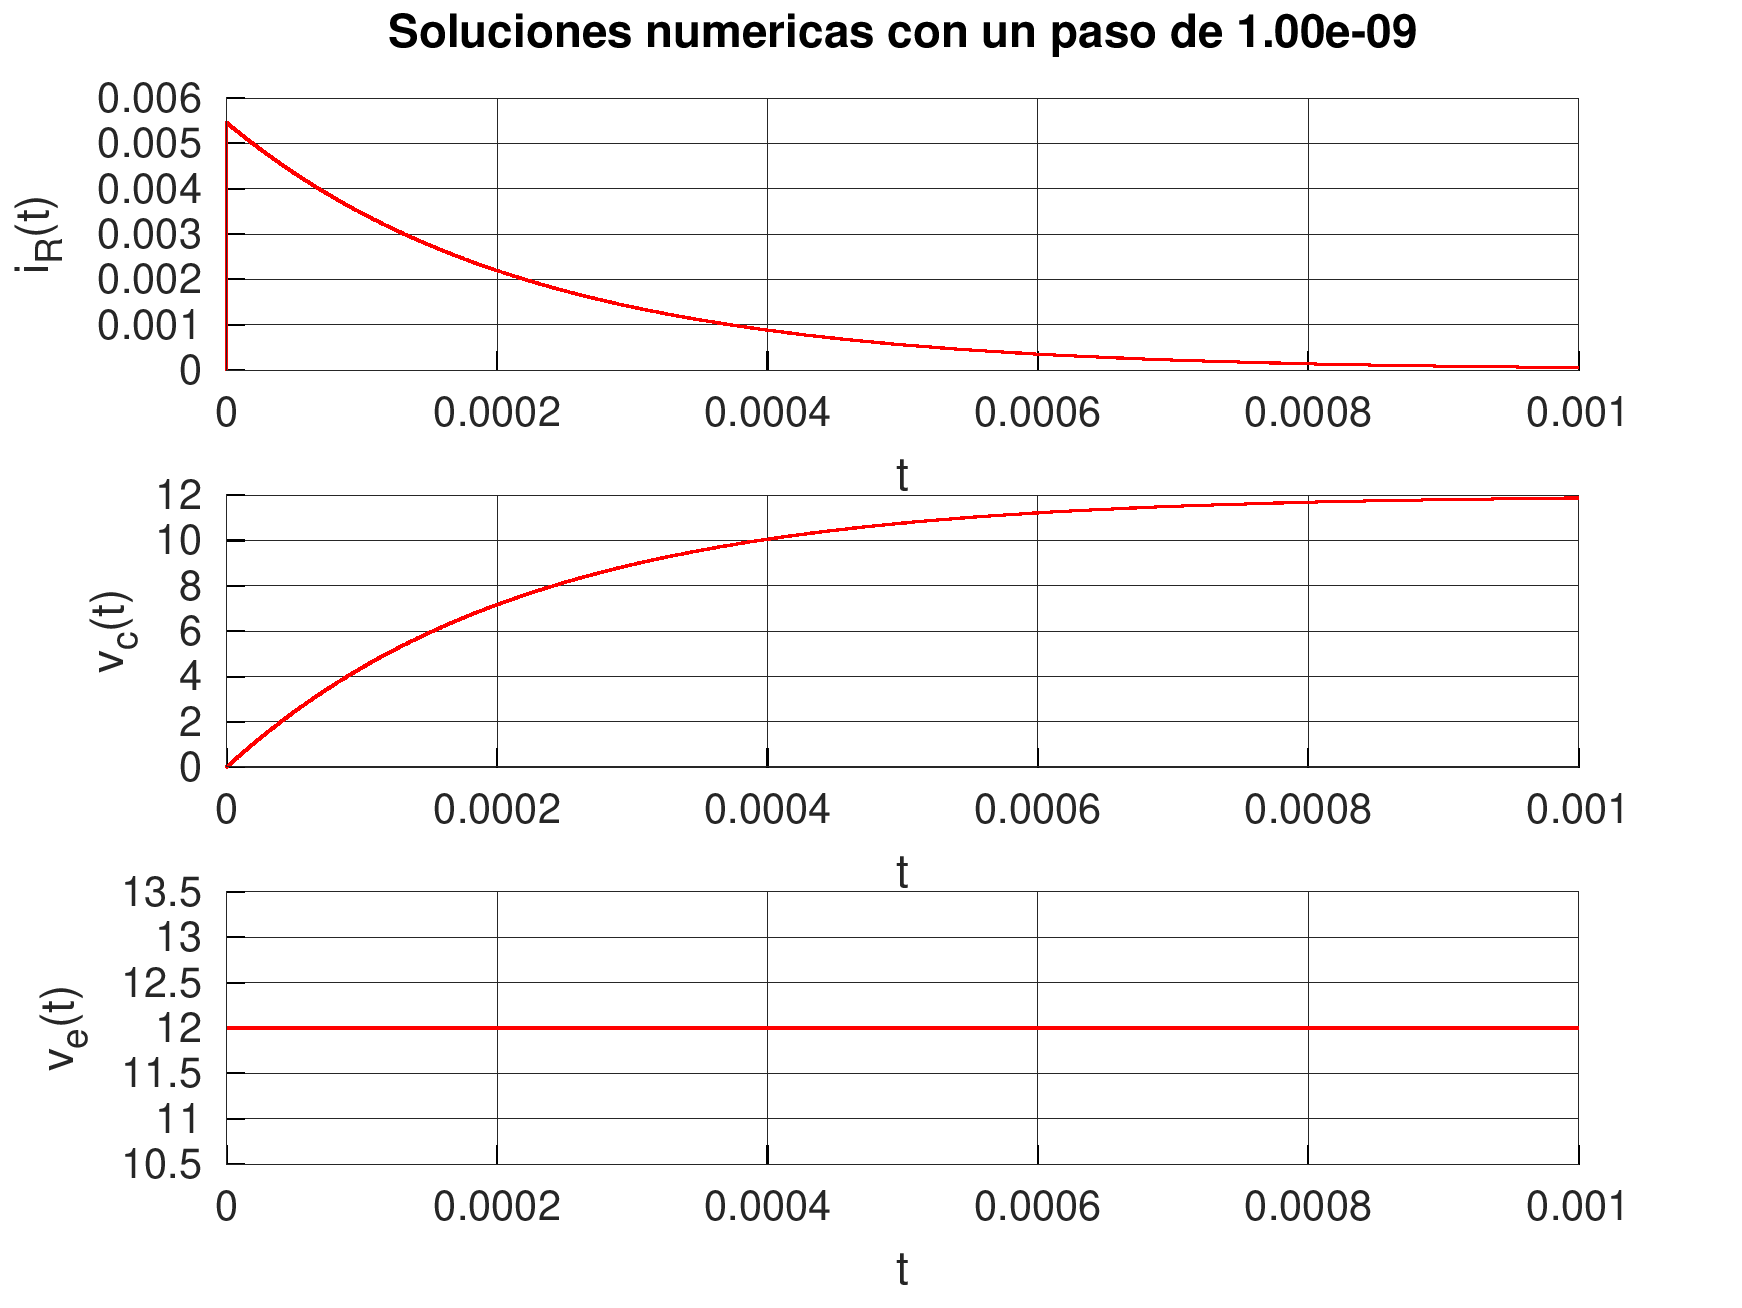

In [ ]:
from PIL import Image
imt4 = Image.open("/content/Simulacion1.png")
imt4

#Con entrada Onda Cuadrada

In [ ]:
%%writefile simcononda.m
clc;clear all;
warning('off','all');

%Definicion de parametros
R=1
L=1
C=1
TL=1.15*10^(-4);
u=12


tsim=0.005 %Del analisis %tiempo de simulacion
t_etapa=tsim/1000
wRef=2;
tF=tsim;

X=-[0; 0];ii=0;% CONDICIONES INICIALES

color_='r';%COLORES GRAFICO
color='b';
tamano2=2;
Ts=t_etapa;

h=t_etapa/1000 %quiero que muestre el valor no pongo coma

%Calculo

for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;

  x1(ii)=X(1);%corriente
  x2(ii)=X(2);%tensión en el capacitor
  ut=ondacuad(u,t);
  X=modrlc2(t_etapa, X, ut,R,L,C,h);
  acc(ii)=u;
end

%Xprueba=modrlc2(0.01, [0,0], 12, 2200, 10^(-5), 10^(-7),10^(e-8))

%REPRESENTACION Grafica

t=0:t_etapa:tF;

hfig2 = figure(1); set(hfig2, 'Visible', 'off');

subplot(3,1,1);hold on;
plot(t,x1,color_,'LineWidth', tamano2);
title(sprintf('Soluciones numericas con un paso de %.2e', h));
xlabel('t');
ylabel('i_R(t)'); hold on;
%plot(t,x1_analitica,color);
hold on;
grid on

subplot(3,1,2);hold on;
plot(t,x2,color_,'LineWidth', tamano2);
xlabel('t');
ylabel('v_c(t)');
grid on

subplot(3,1,3);hold on;
plot(t,ondacuad(u,t),color_,'LineWidth', tamano2);
xlabel('t');
ylabel('v_e(t)');

grid on

print(hfig2,'Simulacion3','-r300','-dpng');
% Guardar las variables en un archivo .mat
save('Sim3.mat','-v7');




Overwriting simcononda.m


In [ ]:
%%writefile ondacuad.m
function[Vs]=ondacuad(Ve,t)
  % Parámetros de la onda cuadrada
  frecuencia = 500; % frecuencia en Hz (1 ciclo por segundo)
  periodo = 1 / frecuencia; % período en segundos
  duty= 50; % ciclo de trabajo del 50% (onda simétrica)

  % Generar la onda cuadrada
  onda_cuadrada = Ve*(duty/100 * (1 + sign(sin(2*pi*frecuencia*t))) - (1-duty/100)* (1 - sign(sin(2*pi*frecuencia*t))));
  Vs = [onda_cuadrada]; % x1 corriente, x2 tensión
end


Overwriting ondacuad.m


In [ ]:
# -W : no window system
!octave -W simcononda.m
import scipy.io
mat2 = scipy.io.loadmat('/content/Sim3.mat')#Se carga asi pues son los que puede cargar .mat

R = 1
L = 1
C = 1
u = 12
tsim = 5.0000e-03
t_etapa = 5.0000e-06
h = 5.0000e-09


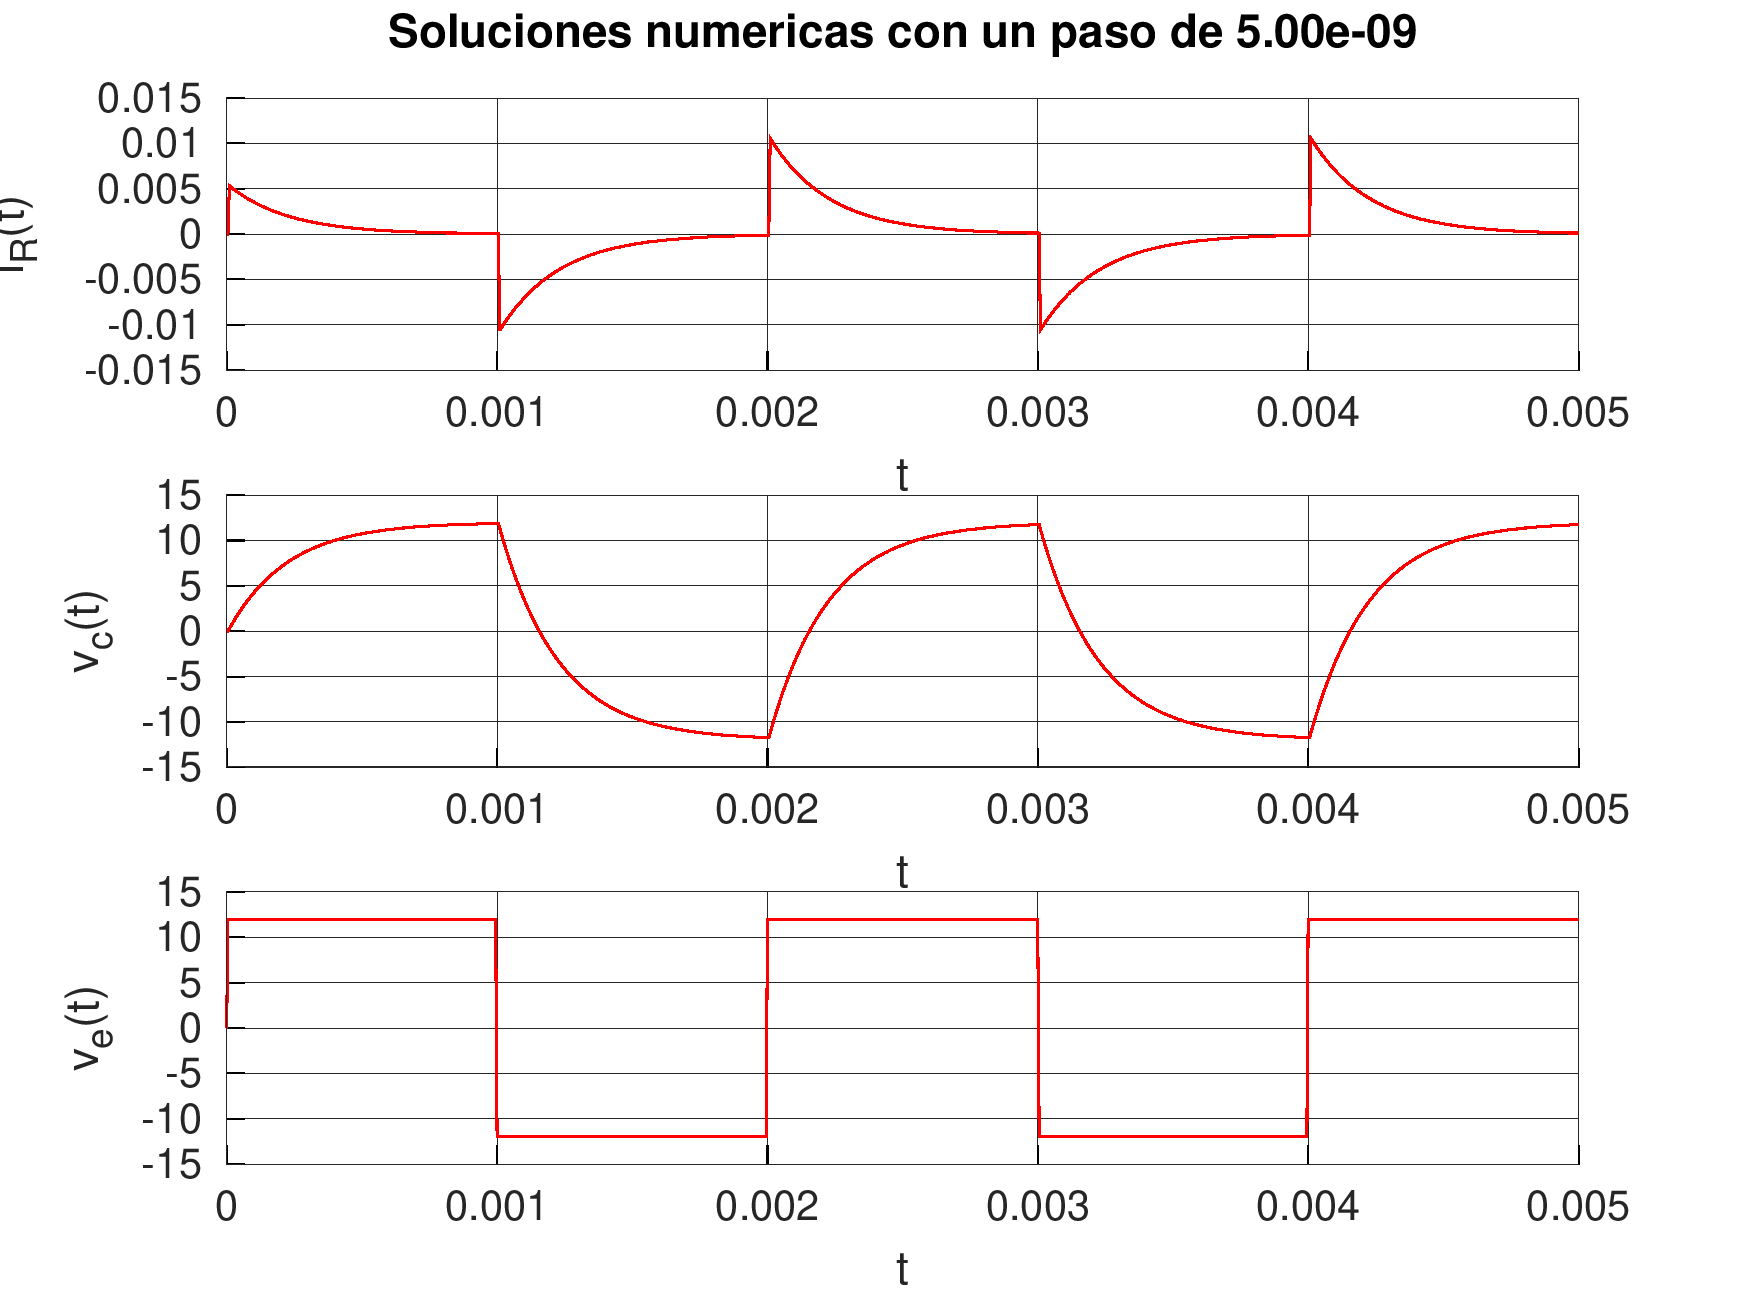

In [ ]:
from PIL import Image
imt5 = Image.open("/content/Simulacion3.png")
imt5

En la figura anterior se contruyo una funcion de tal manera que cada 1 ms, cambie de signo, se puede notar que la tension del capacitor pese a los cambios en la tension de entrada, va en aumento de forma oscilatoria,las oscilaciones son coincidentes por la entrada pero la evolucion  global quizas sea aumentar hasta un valor y despues caer rapidamente.


Para la grafica de la corriente podemos notar que se obtiene un resultado esperado, se ve como es que  al aumentar la tension, la corriente aumenta y al dimsinuir la corriente disminuye.


En este caso se eligio realizar la simulacion con RLC unitarios pues con el caso anterior, como $\tau \approx 9*10^{-9}$, luego estos efectos no se iban a observar bien, para el sistema hubiese sido equivalente  tener una entrada constante.


# Guardado archivos a drive

Para guardar todos los archivos y las imágenes generadas en el Gdrive, se puede proceder mediante el montado en el entorno de trabajo, y luego copiar todo mediante Python. Con la instrucción de Linux `!cp archivo dir_destino` se puede copiar uno por uno todos los archivos.

In [ ]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !cp Vars_temporal.png /content/drive/MyDrive/CursoHCSPD2024 #Copia uno por uno
import os
import shutil

def copydrive(fname):
    src = os.path.join('/content', fname)
    dst_dir = os.path.join('/content/drive/MyDrive/HCSPD/Semana1')
    dst = os.path.join(dst_dir, fname)

    # Crear el directorio de destino si no existe
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    shutil.copyfile(src, dst)
    print(f"Archivo {fname} copiado a {dst}")

fnames = ['Vars_temporal.png','Calculo_RLC_Simbolico.m','Verificacion_Num.m','Verificacion_Num_1.mat','modrlc.m','R_symbolica.png','Simulacion1.png','Simulacion3.png'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  copydrive(fname)

Archivo Vars_temporal.png copiado a /content/drive/MyDrive/HCSPD/Semana1/Vars_temporal.png
Archivo Calculo_RLC_Simbolico.m copiado a /content/drive/MyDrive/HCSPD/Semana1/Calculo_RLC_Simbolico.m
Archivo Verificacion_Num.m copiado a /content/drive/MyDrive/HCSPD/Semana1/Verificacion_Num.m
Archivo Verificacion_Num_1.mat copiado a /content/drive/MyDrive/HCSPD/Semana1/Verificacion_Num_1.mat
Archivo modrlc.m copiado a /content/drive/MyDrive/HCSPD/Semana1/modrlc.m
Archivo R_symbolica.png copiado a /content/drive/MyDrive/HCSPD/Semana1/R_symbolica.png
Archivo Simulacion1.png copiado a /content/drive/MyDrive/HCSPD/Semana1/Simulacion1.png
Archivo Simulacion3.png copiado a /content/drive/MyDrive/HCSPD/Semana1/Simulacion3.png
